Simple linear
(a)		 : 91.35160879723867
(b)		 : [-96.46104138]
R_squared	 : 0.79
MSE		 : 105416.91



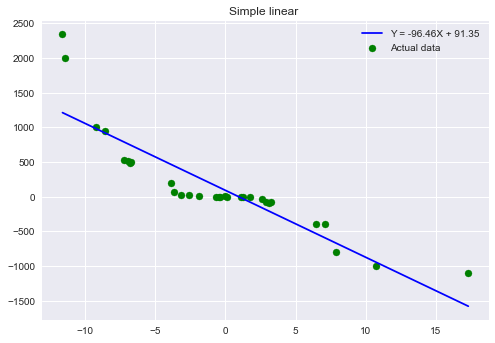

degree 1
(a)		 : 91.35160879723867
(b)		 : [  0.         -96.46104138]
R_squared	 : 0.79
MSE		 : 105416.91



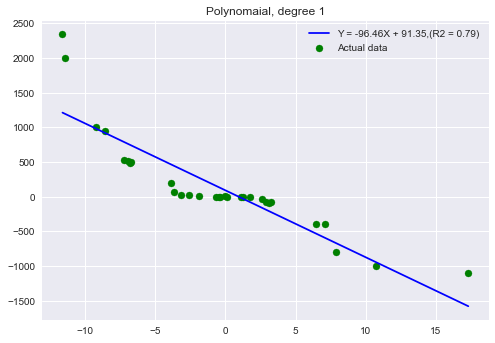

degree 2
(a)		 : -46.64978649116003
(b)		 : [   0.         -102.72911929    3.14470147]
R_squared	 : 0.86
MSE		 : 69105.40



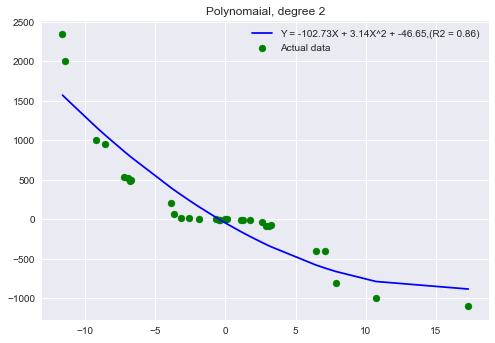

degree 3
(a)		 : -106.51864604541296
(b)		 : [  0.         -57.03226761   5.7525466   -0.37703167]
R_squared	 : 0.93
MSE		 : 37169.91



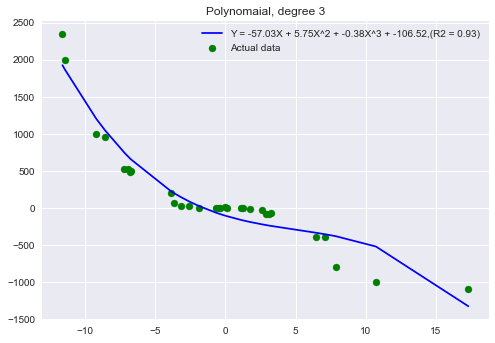

degree 4
(a)		 : 15.933025038910017
(b)		 : [  0.         -27.3661294   -3.03891859  -0.86490249   0.05284339]
R_squared	 : 0.99
MSE		 : 4503.18



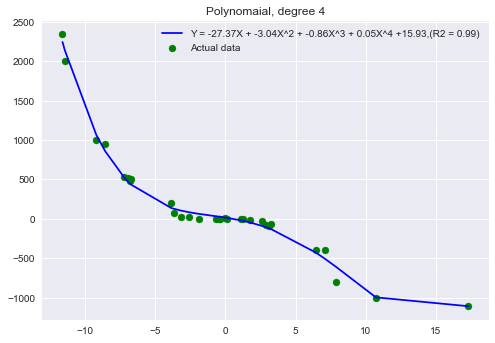

degree 5
(a)		 : 5.703486962592592
(b)		 : [ 0.00000000e+00 -1.74480732e+01 -1.92213058e+00 -1.11725461e+00
  4.18246219e-02  1.16597903e-03]
R_squared	 : 0.99
MSE		 : 3992.33



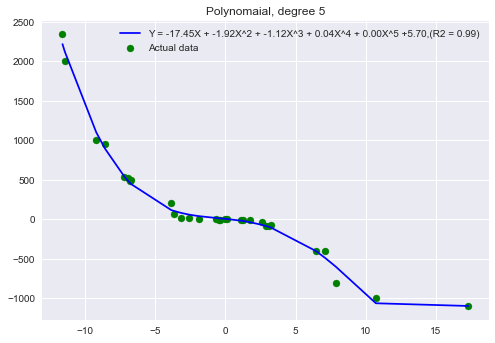

predict reponses for new_x:
 [ -211.23415523 14721.85089312  4560.30438021 32956.81372589]


In [126]:
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt 
import pandas as pd
plt.style.use("seaborn")

df = pd.read_csv("data/data_quiz.csv")
x_train = df[['X']]
y_train = df['Y']

model = LinearRegression()
model.fit(x_train,y_train)
b = model.coef_
a = model.intercept_
y_pred = model.predict(x_train)
r2 = r2_score(y_train,y_pred)
mse = mean_squared_error(y_train,y_pred)
print("Simple linear")
print("(a)\t\t :",a)
print("(b)\t\t :",b)
print("R_squared\t : %.2f"%(r2))
print("MSE\t\t : %.2f\n"%(mse))
plt.title("Simple linear ")
plt.scatter(x_train,y_train,color = "green", label="Actual data")
plt.plot(x_train,y_pred,color="blue",label="Y = %.2fX + %.2f"%(b,a))
plt.legend()
plt.show()

s = ["Y = %.2fX + %.2f,(R2 = %.2f)",
    "Y = %.2fX + %.2fX^2 + %.2f,(R2 = %.2f)",
    "Y = %.2fX + %.2fX^2 + %.2fX^3 + %.2f,(R2 = %.2f)",
    "Y = %.2fX + %.2fX^2 + %.2fX^3 + %.2fX^4 +%.2f,(R2 = %.2f)",
    "Y = %.2fX + %.2fX^2 + %.2fX^3 + %.2fX^4 + %.2fX^5 +%.2f,(R2 = %.2f)"]
def calculator(d):
    poly = PolynomialFeatures(degree =d)
    x_poly = poly.fit_transform(x_train)
    model_poly = LinearRegression()
    model_poly.fit(x_poly,y_train)

    b = model_poly.coef_
    a = model_poly.intercept_
    y_pred = model_poly.predict(x_poly)
    r2 = r2_score(y_train,y_pred)
    mse = mean_squared_error(y_train,y_pred)
    print("degree",d)
    print("(a)\t\t :",a)
    print("(b)\t\t :",b)
    print("R_squared\t : %.2f"%(r2))
    print("MSE\t\t : %.2f\n"%(mse))
        
    x = model_poly.predict(poly.fit_transform(x_train))
    plt.title("Polynomaial, degree %d"%(d))
    plt.scatter(x_train,y_train,color = "green", label="Actual data")
    if(d==1):
        plt.plot(x_train,x,color="blue",label=s[d-1]%(b[1],a,r2))
    elif(d==2):
            plt.plot(x_train,x,color="blue",label=s[d-1]%(b[1],b[2],a,r2))
    elif(d==3):
            plt.plot(x_train,x,color="blue",label=s[d-1]%(b[1],b[2],b[3],a,r2))
    elif(d==4):
            plt.plot(x_train,x,color="blue",label=s[d-1]%(b[1],b[2],b[3],b[4],a,r2))
    elif(d==5):
            plt.plot(x_train,x,color="blue",label=s[d-1]%(b[1],b[2],b[3],b[4],b[5],a,r2))
    plt.legend()
    plt.show()
    return x

for i in range(5):
    calculator(i+1)

new_x = np.array([20,-20,25,-25]).reshape(-1,1)
poly = PolynomialFeatures(degree = 4)
x_poly = poly.fit_transform(x_train)
model_poly = LinearRegression()
model_poly.fit(x_poly,y_train)
new_pred = model_poly.predict(poly.fit_transform(new_x))
print("predict reponses for new_x:\n",new_pred)




Best degree 5 with RMSE 102.30631285375816


Text(0, 0.5, 'RMSE')

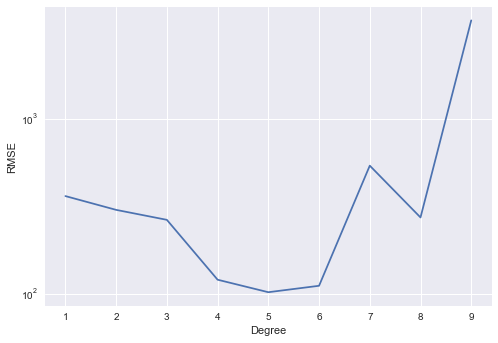

In [127]:
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import pandas as pd
plt.style.use("seaborn")

df = pd.read_csv("data/data_quiz.csv")
X = df[['X']]
y= df['Y']


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

rmses = []
degrees = np.arange(1, 10)
min_rmse, min_deg = 1e10, 0

for deg in degrees:

    # Train features
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    x_poly_train = poly_features.fit_transform(x_train)

    # Linear regression
    poly_reg = LinearRegression()
    poly_reg.fit(x_poly_train, y_train)

    # Compare with test data
    x_poly_test = poly_features.fit_transform(x_test)
    poly_predict = poly_reg.predict(x_poly_test)
    poly_mse = mean_squared_error(y_test, poly_predict)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)
    
    # Cross-validation of degree
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_deg = deg

# Plot and present results
print('Best degree {} with RMSE {}'.format(min_deg, min_rmse))
        
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')